## DQN

### Environment
- The environment consists of an agent which needs to use a ball to break bricks and score points.
- We receive the current state of the environment in the form of an image of the current state of game.
- Using this we need to estimate the best next action possible and ence use the MSE loss to train our model.
- We can consider the neural net as a black box which takes the set of states as its input and gives the corresponding $Q$ values as output. We can then choose the action = $argmax_{action} Q(state)$.


### DQN Algorithm
- Main idea in DQN is we try to estimate $Q(s,a)$ values as in other TD Algorithms but instead of filling a $Q(s,a)$ matrix, we train a neural network.
- We try to minimize the loss in each episode/epoch.Loss is given by:
\begin{equation}
    J = ( reward + \gamma \max_{a^{'}}\hat{Q} (s,a^{'}) - \hat{Q})^2
\end{equation}
- The algorithm tens to forget the previous experiences as it overwrites them with new experiences, so in order to overcome this we come up with the idea of replay experience.
- Basically, we store some states (video frames) into buffer and sample a mini_batch of samples to train the deep network. This forms a input dataset stable enough for training.Samples are iid as they are randomly smapled from buffer.

#### Target Network
- we create 2 deep networks. We use the first one to fix the target and update the 2nd one.This is done so that we have a stable target to chase.

### As Atari Breakout was fairly complex to write and took a lot of time to trian, so I implemented the DQN on a much simpler problem of Cart-pole.
- It is fairly simple problem, in which we have to balance a stick on a platform by moving left or right. 

In [1]:
import gym
from DQN_Agent import DQNAgent,learn
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

G = learn(env,agent,10)

episode: 0/10
episode: 1/10
episode: 2/10
episode: 3/10
episode: 4/10
episode: 5/10
episode: 6/10
episode: 7/10
episode: 8/10
episode: 9/10


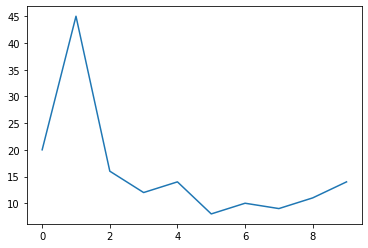

In [6]:
plt.plot(G)

In [11]:
def test(env,agent,episodes):
    G = []


    for e in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, agent.state_size])
        for time in range(500):
            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, agent.state_size])
            
            state = next_state
            if done:
                print("episode: {}/{}, score: {}"
                  .format(e, episodes, time))

                G.append(time)
                break
            

    return G

In [12]:
agent = DQNAgent(state_size, action_size)
agent.load("./cartpole-dqn.h5")
agent.epsilon = 0.0
G = test(env,agent,10)

episode: 0/10, score: 405
episode: 1/10, score: 354
episode: 2/10, score: 437
episode: 3/10, score: 351
episode: 4/10, score: 418
episode: 5/10, score: 369
episode: 6/10, score: 470
episode: 7/10, score: 360
episode: 8/10, score: 450
episode: 9/10, score: 393


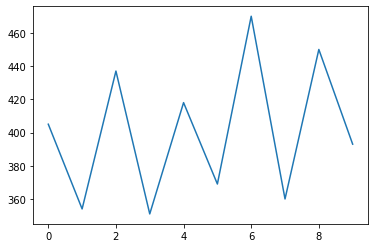

In [13]:
plt.plot(G)